# Colored Noise Experiments

## Import

In [1]:
import numpy as np
import ordpy
from features_extractor.entropy_complexity import get_entropy_fisher, get_weighted_entropy_fisher
from features_extractor.entropy_complexity_correct import get_weighted_entropy_complexity, get_entropy_complexity
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [6]:
from utils.images_generator import henon_map, normalize_img_to_0_255, generate_histogram

In [2]:
import numpy as np
from PIL import Image
from scipy import fftpack
import matplotlib.pyplot as plt

def generate_colored_noise(size, noise_type='white', beta=0):
    """
    Generate 2D colored noise.
    
    Parameters:
    size (tuple): Size of the noise array (height, width)
    noise_type (str): Type of noise ('white', 'pink', 'brown', 'blue', 'violet', 'grey')
    beta (float): Custom power law for grey noise
    
    Returns:
    numpy.ndarray: 2D array of noise values
    """
    # Create frequency space coordinates
    rows, cols = size
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    xx, yy = np.meshgrid(x, y)
    
    # Calculate radial frequency
    r = np.sqrt(xx**2 + yy**2)
    
    # Generate white noise in frequency domain
    noise_real = np.random.normal(0, 1, size)
    noise_imag = np.random.normal(0, 1, size)
    noise_complex = noise_real + 1j * noise_imag
    
    # Define power law based on noise type
    if noise_type == 'white':
        power = np.ones_like(r)
    elif noise_type == 'pink':
        power = 1 / np.sqrt(r + 1e-10)  # Add small constant to avoid division by zero
    elif noise_type == 'brown' or noise_type == 'red':
        power = 1 / (r + 1e-10)
    elif noise_type == 'blue':
        power = np.sqrt(r + 1e-10)
    elif noise_type == 'violet':
        power = r + 1e-10
    elif noise_type == 'grey':
        power = (r + 1e-10) ** (beta/2)
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")
    
    # Apply power law filter
    noise_filtered = noise_complex * power
    
    # Transform back to spatial domain
    noise = np.real(fftpack.ifft2(fftpack.ifftshift(noise_filtered)))
    
    # Normalize to [0, 1] range
    noise = noise - np.min(noise)
    noise = noise / np.max(noise)
    
    return noise

def add_colored_noise(image, noise_type='white', intensity=0.5, beta=0):
    """
    Add colored noise to an image.
    
    Parameters:
    image (PIL.Image): Input image
    noise_type (str): Type of noise ('white', 'pink', 'brown', 'blue', 'violet', 'grey')
    intensity (float): Noise intensity factor (0 to 1)
    beta (float): Power law for grey noise
    
    Returns:
    PIL.Image: Image with added noise
    """
    # Convert image to numpy array
    img_array = np.array(image).astype(float) / 255.0
    
    # Generate noise for each channel
    noise_shape = img_array.shape[:2]
    noised_image = np.zeros_like(img_array)
    
    for channel in range(img_array.shape[2]):
        noise = generate_colored_noise(noise_shape, noise_type, beta)
        noised_channel = img_array[:,:,channel] + intensity * noise
        noised_channel = np.clip(noised_channel, 0, 1)
        noised_image[:,:,channel] = noised_channel
    
    # Convert back to PIL Image
    return Image.fromarray((noised_image * 255).astype(np.uint8))

def demonstrate_noise_types(image):
    """
    Demonstrate different types of noise on an image.
    
    Parameters:
    image (PIL.Image): Input image
    
    Returns:
    PIL.Image: Grid of images with different noise types
    """
    noise_types = ['white', 'pink', 'brown', 'blue', 'violet']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # Original image
    axes[0].imshow(image)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Add different types of noise
    for i, noise_type in enumerate(noise_types, 1):
        noised = add_colored_noise(image, noise_type=noise_type, intensity=0.5)
        axes[i].imshow(noised)
        axes[i].set_title(f'{noise_type.capitalize()} Noise')
        axes[i].axis('off')
    
    plt.tight_layout()
    return fig

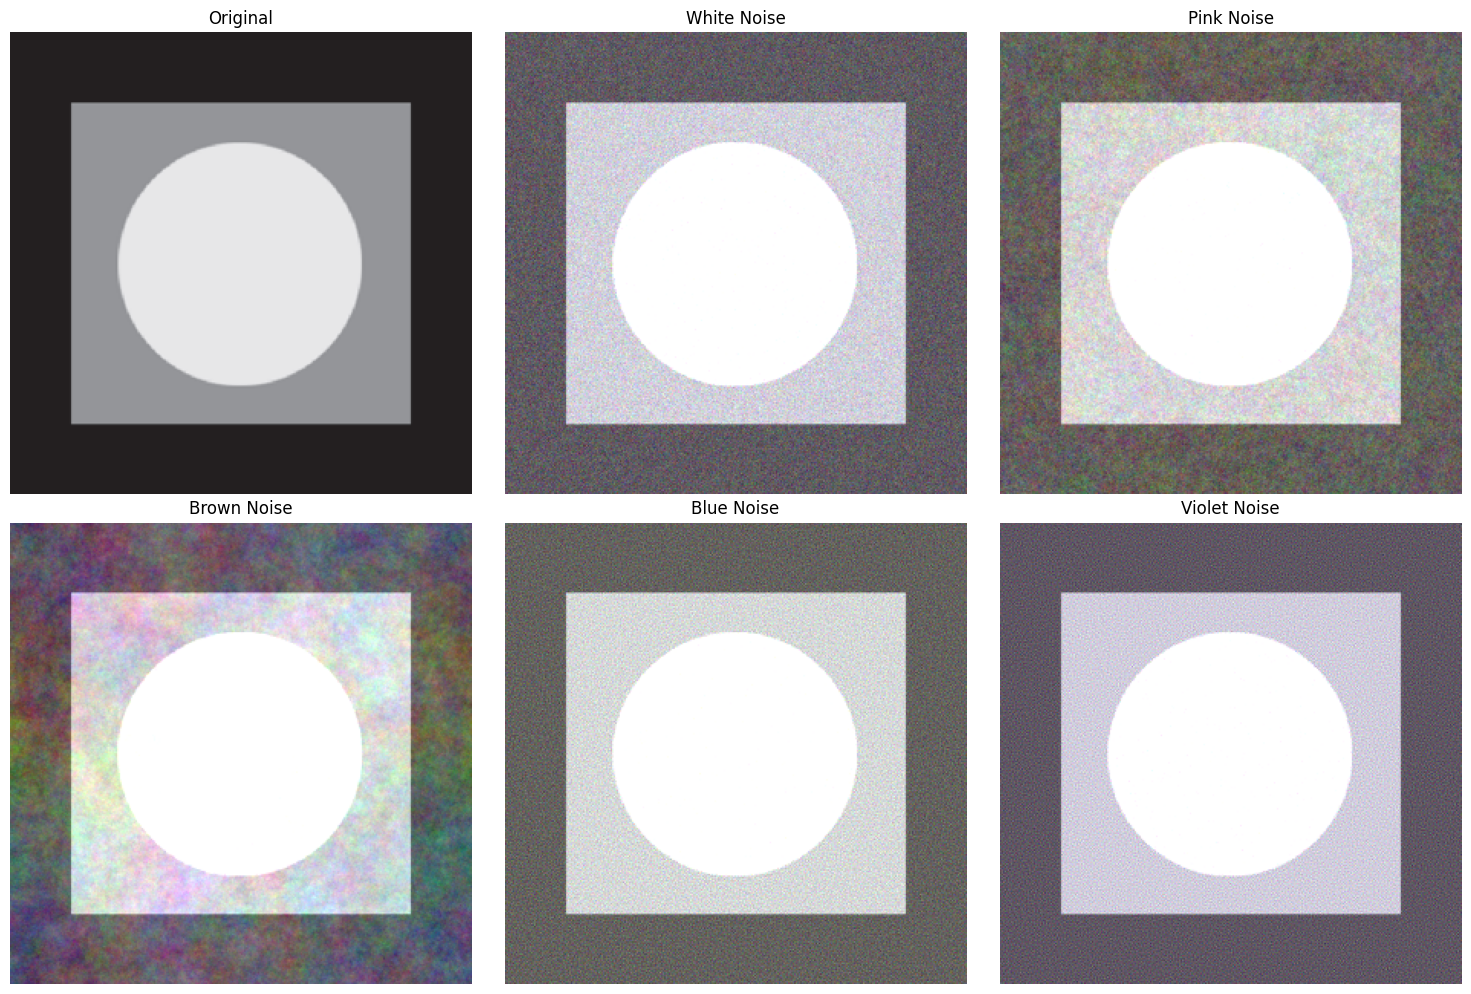

In [5]:
from PIL import Image

img_name = "noise_original"
# Load an image
image = Image.open(f'data/misc/{img_name}.png')

# Add white noise
noised_image = add_colored_noise(image, noise_type='white', intensity=0.3)

# Add pink noise with higher intensity
pink_noised = add_colored_noise(image, noise_type='pink', intensity=0.7)

# Create a demonstration of all noise types
fig = demonstrate_noise_types(image)
fig.savefig('noise_demo.png')

In [8]:
from PIL import Image

img_name = "noise_original"
# Load an image
image = Image.open(f'data/misc/{img_name}.png')
for i, noise_type in enumerate(['white', 'pink', 'brown', 'blue', 'grey']):
    noised = add_colored_noise(image, noise_type=noise_type, intensity=0.7)
    noised = noised.convert('L')
    noised.save(f'data/misc/{img_name}_{noise_type}.png')

## Generating data for the images

In [12]:
from utils.experiments_functions import get_img_info

In [13]:
image_y_data = get_img_info(image_y, q_linspace = np.linspace(-2, 20, num = 221))
image_y_data.head(5)

q = -2.0
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9286792632931098; Complexity Measure = 0.08918946611984883;
q = -1.9
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9317427040481605; Complexity Measure = 0.08766865408053541;
q = -1.8
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9328843303966377; Complexity Measure = 0.08787946818683472;
q = -1.7
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9327564369891758; Complexity Measure = 0.089322889496825

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2
0,-2.0,-0.117455,0.017512,0.928679,0.089189,0.215879,0.400817,0.383305
1,-1.9,-0.115262,-0.004467,0.931743,0.087669,0.218072,0.388731,0.393197
2,-1.8,-0.113272,-0.021818,0.932884,0.087879,0.220061,0.379060,0.400879
3,-1.7,-0.111376,-0.035349,0.932756,0.089323,0.221957,0.371347,0.406696
4,-1.6,-0.109503,-0.045811,0.931827,0.091597,0.223830,0.365180,0.410990


In [14]:
image_x_data = get_img_info(image_x, q_linspace = np.linspace(-2, 20, num = 221))
image_x_data.head(5)

q = -2.0
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9288698703150159; Complexity Measure = 0.08896096788287941;
q = -1.9
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.931938136651264; Complexity Measure = 0.08743639604977471;
q = -1.8
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9330809239620579; Complexity Measure = 0.08764644455952188;
q = -1.7
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = 0.9329507785587324; Complexity Measure = 0.0890918430237058

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2
0,-2.0,-0.116545,0.016935,0.928870,0.088961,0.216788,0.400073,0.383138
1,-1.9,-0.114396,-0.005015,0.931938,0.087436,0.218937,0.388024,0.393039
2,-1.8,-0.112461,-0.022336,0.933081,0.087646,0.220872,0.378396,0.400732
3,-1.7,-0.110628,-0.035832,0.932951,0.089092,0.222705,0.370731,0.406563
4,-1.6,-0.108821,-0.046259,0.932016,0.091370,0.224513,0.364614,0.410873


In [23]:
image_y_data.to_csv(f"results/henon_map/henon_map_Y_a_{a}_b_{b}.csv", index = False)
image_x_data.to_csv(f"results/henon_map/henon_map_X_a_{a}_b_{b}.csv", index = False)

## Generating both planes

In [5]:
image_y_data = pd.read_csv(f"results/henon_map/henon_map_Y_a_{a}_b_{b}.csv")
image_x_data = pd.read_csv(f"results/henon_map/henon_map_X_a_{a}_b_{b}.csv")

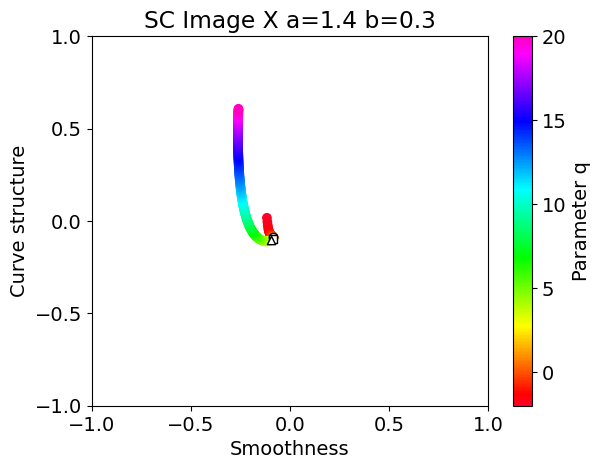

<Figure size 640x480 with 0 Axes>

In [16]:
for letter, data_ss in [('Y', image_y_data), ('X', image_x_data)]:
    # SMOOTHNESS
    plt.figure(1)
    plt.clf() # clears the figure
    plt.rcParams.update({"font.size": 14})
    scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
    # Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
    special_symbols = {0: 'o', 1: 's', 2: '^'}
    for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')

    plt.colorbar(scatter, label='Parameter q')
    # plt.ylim([0, 1])
    # plt.xlim([0, 1])
    plt.ylim([-1, 1])
    plt.xlim([-1, 1])
    plt.xlabel('Smoothness')
    plt.ylabel('Curve structure')
    plt.title(f'SC Image {letter} a={a} b={b}')

    plt.savefig(f'results/henon_map/planes/henon_map_SCplane_weighted_henon_map_{letter}_a_{a}_b_{b}.png')
            
    # CECP
    plt.figure(2)
    plt.clf() # clears the figure
    plt.rcParams.update({"font.size": 17})
    scatter = plt.scatter(data_ss['Weighted Entropy Correct'], data_ss['Weighted Complexity Correct'], c=data_ss['q'], cmap='gist_rainbow')
    # Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
    special_symbols = {0: 'o', 1: 's', 2: '^'}
    for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Weighted Entropy Correct"], subset["Weighted Complexity Correct"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
    plt.colorbar(scatter, label='Parameter q')
    # plt.ylim([0, 1])
    # plt.xlim([0, 1])
    plt.ylim([-1, 1])
    plt.xlim([-1, 1])
    plt.xlabel('Weighted Entropy')
    plt.ylabel('Weighted Complexity')
    plt.title(f'CECP Image {letter} a={a} b={b}')

    plt.savefig(f'results/henon_map/planes/henon_map_CECPplane_weighted_henon_map_{letter}_a_{a}_b_{b}.png')
    plt.clf() # clears the figure